In [213]:
import numpy as np

In [214]:
list_daHao = [10,45,22,64,27,8,85,80,50,22,3,70,76,47,70,10,13,84,87,5,77,11,95,21,15,92,82,18,27,1]
len(list_daHao)

30

In [215]:
list_xiaoHao = [1,46,12,12,94,99,43,64,96,25,51,79,12,44,76,54,81,22,80,28,55,72,93,89,36,47,58,91,13,78]
len(list_xiaoHao)

30

In [263]:
list_2 = []
num_element = 10

for i in range(100):
    sum = 0
    for j in range(num_element):
        n = np.random.randint(low = 0,high = 30)
        sum += list_xiaoHao[n]
    mean = sum/num_element
    list_2.append(mean)
    

vector_xiaohao = np.asarray(list_2)


list_1 = []
for i in range(100):
    sum = 0
    for j in range(num_element):
        n = np.random.randint(low = 0,high = 30)
        sum += list_daHao[n]
    mean = sum/num_element
    list_1.append(mean)
vector_Dahao = np.asarray(list_1)


In [264]:
mean_Dahao = np.mean(vector_Dahao)
std_Dahao = np.std(vector_Dahao)

print("大号的roll点平均值为%f 标准差为%f " %(mean_Dahao,std_Dahao))

大号的roll点平均值为43.868000 标准差为10.429131 


In [265]:
mean_xiaohao = np.mean(vector_xiaohao)
std_Xiaohao = np.std(vector_xiaohao)
print("小号的roll点平均值为%f 标准差为%f " %(mean_xiaohao,std_Xiaohao))

小号的roll点平均值为55.342000 标准差为10.172415 


In [266]:
import matplotlib.pyplot as plt

In [267]:
from scipy import stats

nobs1 = 30
nobs2 = 30

modified_std1 = np.sqrt(np.float32(nobs1)/np.float32(nobs1-1)) * std_Dahao
modified_std2 = np.sqrt(np.float32(nobs2)/np.float32(nobs2-1)) * std_Xiaohao

(statistic, pvalue) = stats.ttest_ind_from_stats(mean1=mean_Dahao, std1=modified_std1, nobs1=30, mean2=mean_xiaohao, std2=modified_std2, nobs2=30)

print ("拒绝原假设的犯错概率为%f"% pvalue)

拒绝原假设的犯错概率为0.000081


(array([ 3.,  3.,  8., 14., 15., 13., 24.,  8.,  8.,  4.]),
 array([30.5, 35.2, 39.9, 44.6, 49.3, 54. , 58.7, 63.4, 68.1, 72.8, 77.5]),
 <a list of 10 Patch objects>)

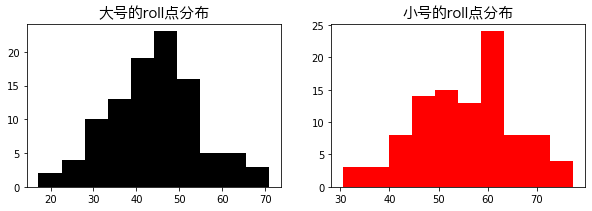

In [268]:
from matplotlib.font_manager import FontProperties
def getChineseFont():  
    return FontProperties(fname='/System/Library/Fonts/PingFang.ttc',size=15)  

plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.title("大号的roll点分布",fontproperties=getChineseFont())
plt.hist(vector_Dahao,bins = 10,color='black')

plt.subplot(1,2,2)
plt.title("小号的roll点分布", fontproperties=getChineseFont())
plt.hist(vector_xiaohao,bins = 10,color='r')

In [269]:
label_0 = np.zeros(100)
matrix_Dahao = np.vstack((vector_Dahao,label_0)).T
label_1 = np.ones(100)
matrix_xiaoHao = np.vstack((vector_xiaohao,label_1)).T

all_data  = np.vstack((matrix_Dahao,matrix_xiaoHao))

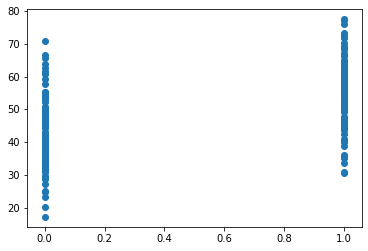

In [270]:
plt.scatter(all_data[:,1],all_data[:,0]);

In [285]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=2).fit(all_data[:,0].reshape(-1, 1))
labels = gmm.predict(all_data[:,0].reshape(-1, 1))
not_equal = labels[labels!=all_data[:,1]]
print("预测正确率为:%d"%((1-len(not_equal)/200)*100) +"%")

预测正确率为:72%
